In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
colnames = ["Date","JD","Apt_GST","Eqn_of_Time","Apparent_RA","Apparent_Decli","Distance","Ang_diam","Hell_Long","Hell_Lat","PA_axis"]
df = pd.read_csv("AstroA1Data.txt", names = colnames)
df.set_index("Date", inplace = True)
df.head()

,JD,Apt_GST,Eqn_of_Time,Apparent_RA,Apparent_Decli,Distance,Ang_diam,Hell_Long,Hell_Lat,PA_axis
Date,,,,,,,,,,
Jan 01,8849.5,06:40:29.4,-03:04.9,18 43 33.32,-23 03 31.8,0.983293,1951.9,70.9,-2.9,2.3
Jan 02,8850.5,06:44:26.0,-03:33.3,18 47 58.33,-22 58 42.3,0.983273,1951.9,57.7,-3.1,1.8
Jan 03,8851.5,06:48:22.5,-04:01.5,18 52 22.99,-22 53 25.3,0.983258,1951.9,44.5,-3.2,1.4
Jan 04,8852.5,06:52:19.1,-04:29.2,18 56 47.27,-22 47 40.9,0.983248,1952.0,31.4,-3.3,0.9
Jan 05,8853.5,06:56:15.6,-04:56.5,19 01 11.16,-22 41 29.4,0.983244,1952.0,18.2,-3.4,0.4


In [3]:
def RA_to_deg(appr_ra):
    temp_list = appr_ra.split() 
    degrees = (int(temp_list[0])*15)+(int(temp_list[1])/4)+(float(temp_list[2])/240)
    return degrees

In [4]:
df["Apparent_RA"] = df["Apparent_RA"].apply(RA_to_deg)
df.head()

,JD,Apt_GST,Eqn_of_Time,Apparent_RA,Apparent_Decli,Distance,Ang_diam,Hell_Long,Hell_Lat,PA_axis
Date,,,,,,,,,,
Jan 01,8849.5,06:40:29.4,-03:04.9,280.888833,-23 03 31.8,0.983293,1951.9,70.9,-2.9,2.3
Jan 02,8850.5,06:44:26.0,-03:33.3,281.993042,-22 58 42.3,0.983273,1951.9,57.7,-3.1,1.8
Jan 03,8851.5,06:48:22.5,-04:01.5,283.095792,-22 53 25.3,0.983258,1951.9,44.5,-3.2,1.4
Jan 04,8852.5,06:52:19.1,-04:29.2,284.196958,-22 47 40.9,0.983248,1952.0,31.4,-3.3,0.9
Jan 05,8853.5,06:56:15.6,-04:56.5,285.296500,-22 41 29.4,0.983244,1952.0,18.2,-3.4,0.4


In [5]:
df.tail()

,JD,Apt_GST,Eqn_of_Time,Apparent_RA,Apparent_Decli,Distance,Ang_diam,Hell_Long,Hell_Lat,PA_axis
Date,,,,,,,,,,
Dec 27,9210.5,06:23:45.9,-01:01.4,276.193000,-23 18 53.5,0.983395,1951.7,346.0,-2.4,4.4
Dec 28,9211.5,06:27:42.5,-01:30.8,277.300917,-23 16 01.9,0.983356,1951.7,332.8,-2.6,3.9
Dec 29,9212.5,06:31:39.0,-01:59.9,278.408042,-23 12 42.4,0.983324,1951.8,319.7,-2.7,3.4
Dec 30,9213.5,06:35:35.6,-02:28.8,279.514250,-23 08 55.1,0.983298,1951.9,306.5,-2.8,2.9
Dec 31,9214.5,06:39:32.1,-02:57.5,280.619375,-23 04 40.0,0.983278,1951.9,293.3,-2.9,2.4


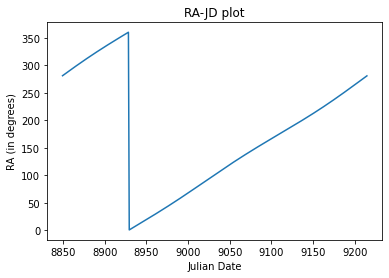

In [6]:
X = df["Apparent_RA"]
y = df["JD"]

plt.plot(y,X)
plt.xlabel("Julian Date")
plt.ylabel("RA (in degrees)")
plt.title("RA-JD plot")
plt.savefig("RA-JD plot.png", dpi=600)
plt.savefig("RA-JD plot.pdf", dpi=600)
plt.show()

In [7]:
df.loc[df["Apparent_RA"] == 0.7663333333333333]

,JD,Apt_GST,Eqn_of_Time,Apparent_RA,Apparent_Decli,Distance,Ang_diam,Hell_Long,Hell_Lat,PA_axis
Date,,,,,,,,,,
Mar 21,8929.5,11:55:53.9,-07:11.1,0.766333,+00 19 55.8,0.996158,1926.7,97.2,-7.0,-25.3


In [8]:
for i in df["JD"]:
    if i > 8928.5:
        new_value = df.loc[df["JD"]==i,"Apparent_RA"]+360
        df.loc[df["JD"]==i,"Apparent_RA"] = new_value

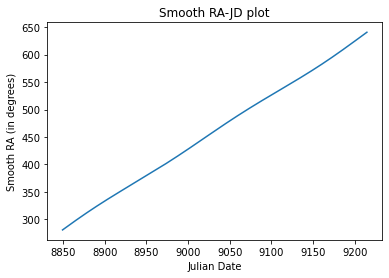

In [9]:
X = df["Apparent_RA"]
y = df["JD"]

plt.plot(y,X)
plt.xlabel("Julian Date")
plt.ylabel("Smooth RA (in degrees)")
plt.title("Smooth RA-JD plot")
plt.savefig("Smooth RA-JD plot.png", dpi = 600)
plt.savefig("Smooth RA-JD plot.pdf", dpi = 600)
plt.show()

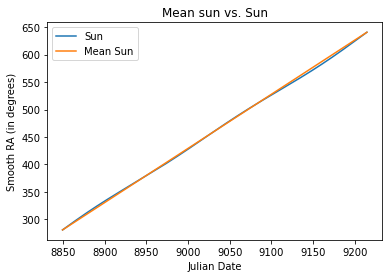

In [10]:
X = df["Apparent_RA"]
y = df["JD"]

plt.plot(y,X)
plt.xlabel("Julian Date")
plt.ylabel("Smooth RA (in degrees)")
plt.title("Mean sun vs. Sun")

end_1 = [df.iloc[0]["JD"],df.iloc[0]["Apparent_RA"]]
end_2 = [df.iloc[-1]["JD"],df.iloc[-1]["Apparent_RA"]]
x_values = [end_1[0],end_2[0]]
y_values = [end_1[1],end_2[1]]

plt.plot(x_values,y_values)
plt.legend(["Sun","Mean Sun"])

plt.savefig("Mean Sun vs. Sun.png", dpi = 600)
plt.savefig("Mean Sun vs. Sun.pdf", dpi = 600)
plt.show()

In [11]:
m = (end_2[1]-end_1[1])/(end_2[0]-end_1[0])
print(m)
df["Mean Sun"] = m*(df["JD"]-end_1[0])+end_1[1]
df.head()

0.9855631278538813


,JD,Apt_GST,Eqn_of_Time,Apparent_RA,Apparent_Decli,Distance,Ang_diam,Hell_Long,Hell_Lat,PA_axis,Mean Sun
Date,,,,,,,,,,,
Jan 01,8849.5,06:40:29.4,-03:04.9,280.888833,-23 03 31.8,0.983293,1951.9,70.9,-2.9,2.3,280.888833
Jan 02,8850.5,06:44:26.0,-03:33.3,281.993042,-22 58 42.3,0.983273,1951.9,57.7,-3.1,1.8,281.874396
Jan 03,8851.5,06:48:22.5,-04:01.5,283.095792,-22 53 25.3,0.983258,1951.9,44.5,-3.2,1.4,282.859960
Jan 04,8852.5,06:52:19.1,-04:29.2,284.196958,-22 47 40.9,0.983248,1952.0,31.4,-3.3,0.9,283.845523
Jan 05,8853.5,06:56:15.6,-04:56.5,285.296500,-22 41 29.4,0.983244,1952.0,18.2,-3.4,0.4,284.831086


In [12]:
def EQT_to_deg(appr_ra):
    temp_list = appr_ra.split(":") 
    degrees = (int(temp_list[0])/4)+(float(temp_list[1])/240)
    return degrees

In [13]:
df["Eqn_of_Time"] = df["Eqn_of_Time"].apply(EQT_to_deg)
df.head()

,JD,Apt_GST,Eqn_of_Time,Apparent_RA,Apparent_Decli,Distance,Ang_diam,Hell_Long,Hell_Lat,PA_axis,Mean Sun
Date,,,,,,,,,,,
Jan 01,8849.5,06:40:29.4,-0.729583,280.888833,-23 03 31.8,0.983293,1951.9,70.9,-2.9,2.3,280.888833
Jan 02,8850.5,06:44:26.0,-0.611250,281.993042,-22 58 42.3,0.983273,1951.9,57.7,-3.1,1.8,281.874396
Jan 03,8851.5,06:48:22.5,-0.993750,283.095792,-22 53 25.3,0.983258,1951.9,44.5,-3.2,1.4,282.859960
Jan 04,8852.5,06:52:19.1,-0.878333,284.196958,-22 47 40.9,0.983248,1952.0,31.4,-3.3,0.9,283.845523
Jan 05,8853.5,06:56:15.6,-0.764583,285.296500,-22 41 29.4,0.983244,1952.0,18.2,-3.4,0.4,284.831086


In [14]:
df["diff"] = df["Mean Sun"]-df["Apparent_RA"]

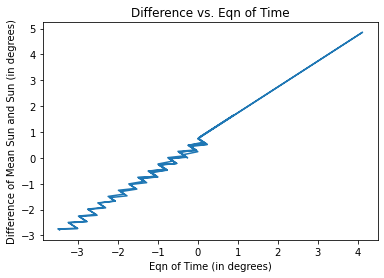

In [15]:
X = df["Eqn_of_Time"]
y = df["diff"]

plt.plot(X,y)
plt.xlabel("Eqn of Time (in degrees)")
plt.ylabel("Difference of Mean Sun and Sun (in degrees)")
plt.title("Difference vs. Eqn of Time")
plt.savefig("Difference vs. Eqn of Time.png", dpi = 600)
plt.savefig("Difference vs. Eqn of Time.pdf", dpi = 600)
plt.show()

In [16]:
df.head()

,JD,Apt_GST,Eqn_of_Time,Apparent_RA,Apparent_Decli,Distance,Ang_diam,Hell_Long,Hell_Lat,PA_axis,Mean Sun,diff
Date,,,,,,,,,,,,
Jan 01,8849.5,06:40:29.4,-0.729583,280.888833,-23 03 31.8,0.983293,1951.9,70.9,-2.9,2.3,280.888833,0.000000
Jan 02,8850.5,06:44:26.0,-0.611250,281.993042,-22 58 42.3,0.983273,1951.9,57.7,-3.1,1.8,281.874396,-0.118645
Jan 03,8851.5,06:48:22.5,-0.993750,283.095792,-22 53 25.3,0.983258,1951.9,44.5,-3.2,1.4,282.859960,-0.235832
Jan 04,8852.5,06:52:19.1,-0.878333,284.196958,-22 47 40.9,0.983248,1952.0,31.4,-3.3,0.9,283.845523,-0.351436
Jan 05,8853.5,06:56:15.6,-0.764583,285.296500,-22 41 29.4,0.983244,1952.0,18.2,-3.4,0.4,284.831086,-0.465414


In [17]:
def Decli_to_deg(appr_dec):
    temp_list = appr_dec.split() 
    degrees = (int(temp_list[0]))+(int(temp_list[1])/60)+(float(temp_list[2])/3600)
    return degrees

In [18]:
df["Apparent_Decli"] = df["Apparent_Decli"].apply(Decli_to_deg)

In [19]:
latitude = math.radians(22.5016)
h_list=[]
for i in range(len(df)):
    test = math.tan(math.radians(df.iloc[i]["Apparent_Decli"]))*math.tan(latitude)
    h_list.append(math.degrees(math.acos(-test)))

In [20]:
df["h"] = h_list
df.head()

,JD,Apt_GST,Eqn_of_Time,Apparent_RA,Apparent_Decli,Distance,Ang_diam,Hell_Long,Hell_Lat,PA_axis,Mean Sun,diff,h
Date,,,,,,,,,,,,,
Jan 01,8849.5,06:40:29.4,-0.729583,280.888833,-22.941167,0.983293,1951.9,70.9,-2.9,2.3,280.888833,0.000000,79.901827
Jan 02,8850.5,06:44:26.0,-0.611250,281.993042,-21.021583,0.983273,1951.9,57.7,-3.1,1.8,281.874396,-0.118645,80.839924
Jan 03,8851.5,06:48:22.5,-0.993750,283.095792,-21.109639,0.983258,1951.9,44.5,-3.2,1.4,282.859960,-0.235832,80.797491
Jan 04,8852.5,06:52:19.1,-0.878333,284.196958,-21.205306,0.983248,1952.0,31.4,-3.3,0.9,283.845523,-0.351436,80.751329
Jan 05,8853.5,06:56:15.6,-0.764583,285.296500,-21.308500,0.983244,1952.0,18.2,-3.4,0.4,284.831086,-0.465414,80.701460


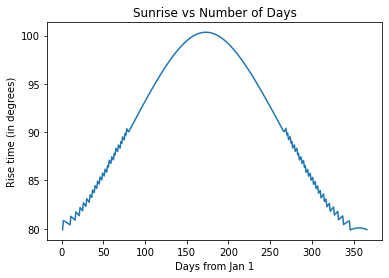

In [21]:
X = df["JD"]-8848.5
y = df["h"]

plt.plot(X,y)
plt.xlabel("Days from Jan 1")
plt.ylabel("Rise time (in degrees)")
plt.title("Sunrise vs Number of Days")
plt.savefig("Sunrise vs Number of Days.png", dpi = 600)
plt.savefig("Sunrise vs Number of Days.pdf", dpi = 600)
plt.show()

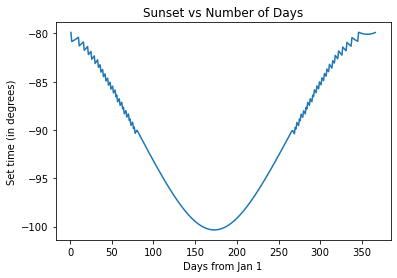

In [22]:
X = df["JD"]-8848.5
y = -df["h"]

plt.plot(X,y)
plt.xlabel("Days from Jan 1")
plt.ylabel("Set time (in degrees)")
plt.title("Sunset vs Number of Days")
plt.savefig("Sunset vs Number of Days.png", dpi = 600)
plt.savefig("Sunset vs Number of Days.pdf", dpi = 600)
plt.show()

In [23]:
df.loc[df["h"]==max(df["h"])]["JD"]

Date
Jun 21    9021.5
Name: JD, dtype: float64

In [24]:
df.loc[df["h"]==min(df["h"])]["JD"]

Date
Dec 11    9194.5
Name: JD, dtype: float64